# Class for Kohenen's Self-Organizing Network

In [1]:
import numpy as np
from matplotlib import pyplot

# -------------------------------------------------------------------------------------------------
#               Kohenen's Self Organizing Network (KSOM)
# -------------------------------------------------------------------------------------------------
class KSOM ():
    def __init__ (self, size_input_features = 0, rows = 0, columns = 0, alpha_init = 0, alpha_update = None, w = None, neighbourhood = False, max_epochs = 0, sigma = 0):
        # Number of features in each input
        self.size_input_features = size_input_features

        # Number of neurons in the feature map
        self.rows = rows
        self.columns = columns
        self.size_featureMap = rows * columns

        # Learning rate
        self.alpha_init = alpha_init
        self.alpha_update = alpha_update

        # Weights
        self.w = w

        # Whether neighbourhood exists or not (True/False)
        self.neighbourhood = neighbourhood

        # Max Allowed Epochs (while training)
        self.max_epochs = max_epochs

        # Initial Value of Sigma
        self.sigma_init = sigma

        # To find the Euclidean distance of all neurons from the winning neuron
        # Map_matrix
        self.d_mat = None
        if neighbourhood:
            self.d_mat = np.random.rand(self.rows*self.columns, 2)
            for i in range(len(self.d_mat)):
                self.d_mat[i] = np.array([i // 100 if j == 0 else i % 100 for j in range(2)])


    # -------------- Train the network with given data -----------------
    def train(self, inputs, checkpoints = []):
        # Step 1: Initialization
        if type(self.w) == type(None):
            self.w = np.random.rand(self.size_input_features, self.size_featureMap)

        checkpoint_weights = np.array([self.w])

        # Step 2: Competition
        for epoch in range(self.max_epochs):
            for input in inputs:
                # Step 2a: Find Winning Neuron
                winner = self.find_Winning_Neuron(input)

                # Step 2b: Update Winner and it's Neighborhood's Weights
                self.update_Neighbourhood_Weights(input, winner, epoch)

            # Save weights, when checkpoints are reached (For Assignment only)
            if (epoch + 1) in checkpoints:
                checkpoint_weights = np.append(checkpoint_weights, [self.w], axis = 0)
                
        return checkpoint_weights
                
        
    # -------------- Function to find the winning neuron for the given data point -----------------
    def find_Winning_Neuron (self, input):
        dist = np.sum(np.square(input.T - self.w.T), axis = 1)
        return np.argmin(dist)


    # -------------- Function to Update Winner and it's Neighborhood's Weights -----------------
    def update_Neighbourhood_Weights (self, input, winner, epoch):
        # For problems without neighbourhood condition
        if not self.neighbourhood:  
            self.w[:, winner] += self.alpha_init * (input - self.w[:, winner])    
        # For problems with neighbourhood
        else:
            alpha = self.update_alpha(epoch)
            sigma_square = np.square(self.sigma_init * np.exp(-(epoch)/self.max_epochs))
            
            winner_mat = np.array([winner // self.rows, winner % self.rows])
            d_square = np.power(self.find_Euclidian_Distance(winner_mat.T, self.d_mat.T), 2).T
            # d = self.find_Euclidian_Distance(self.w, self.w[:, winner])
            h = np.exp(- d_square / (2 * sigma_square))

            self.w +=  (alpha * h * (input.T - self.w.T).T)
            
    
    # -------------- Function to find the learning rate for the given epoch -----------------
    def update_alpha (self, k):
        if self.alpha_update != None:
            return pow(self.alpha_update, k) * self.alpha_init
        else:
            return (self.alpha_init * np.exp(-k/self.max_epochs))
    # ---------------------------------------------------------------------------


    # -------------- Function to find the Eclidean Distance -----------------
    def find_Euclidian_Distance (self, src, dest):
        return np.sqrt(np.sum(np.square(src.T - dest.T), axis = 1)).T
# -------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------


#### Assignment-specific functions

In [2]:
# -------------------------------------------------------------------------------------------------
#               Class - to group together assignment-specific functions
# -------------------------------------------------------------------------------------------------
class assignment ():
    def __init__ (self, alpha_init, test_sigmas_init, max_epochs, checkpoints_epoch):
        self.alpha_init = alpha_init
        self.test_sigmas_init = test_sigmas_init
        self.no_max_epochs = max_epochs
        self.checkpoints_epoch = checkpoints_epoch

        self.training_data = None

    
    def generate_input_data (self):
       # Input to the Network
        self.training_data = np.array([[255,0,0], [139,0,0], [128,0,0], [255,69,0], # Red
                [0,0,255], [135,206,250], [70,130,180], [75,0,130],                 # Blue
                [0,128,0], [0,100,0], [32,178,170], [0,250,154],                    # Green
                [255,255,0], [128,128,0], [240,230,140], [218,165,32],              # Yellow
                [0,128,128], [0,139,139], [0,255,255], [224,255,255],               # Teal
                [255,192,203], [255,20,147], [199,21,133], [128,0,128]]) / 255      # Pink


    def train_and_observe (self):
        config, plot = pyplot.subplots(len(self.test_sigmas_init), len(self.checkpoints_epoch) + 1)
        config.set_size_inches(len(self.test_sigmas_init) * 5, (len(self.checkpoints_epoch) + 1) * 5)

        x = 0
        # Train the network with different values of initial sigma
        for sig in self.test_sigmas_init:            
            ksom_1 = KSOM(size_input_features = 3, rows = 100, columns = 100, alpha_init = self.alpha_init, neighbourhood = True, max_epochs = self.no_max_epochs, sigma = sig)
            results = ksom_1.train(np.array(self.training_data), checkpoints = self.checkpoints_epoch)
            
            # Draw the plots
            # pyplot.text(120, 0, "Plots for Sigma = " + str(sig), fontsize=15)
            for i in range(len(results)):
                if i == 0:
                    plot[x, i].set_title("At epoch: 1\n Spread: " + str(sig))
                else:
                    plot[x, i].set_title("At epoch: " + str(self.checkpoints_epoch[i - 1]) + "\n Spread: " + str(sig))
                plot[x, i].axis("off")
                plot[x, i].imshow(results[i].T.reshape(100, 100, 3))

            x += 1

        pyplot.show()
# -------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------


# Train the Network - with RGB inputs
## + and draw the resulting plots at specified epochs

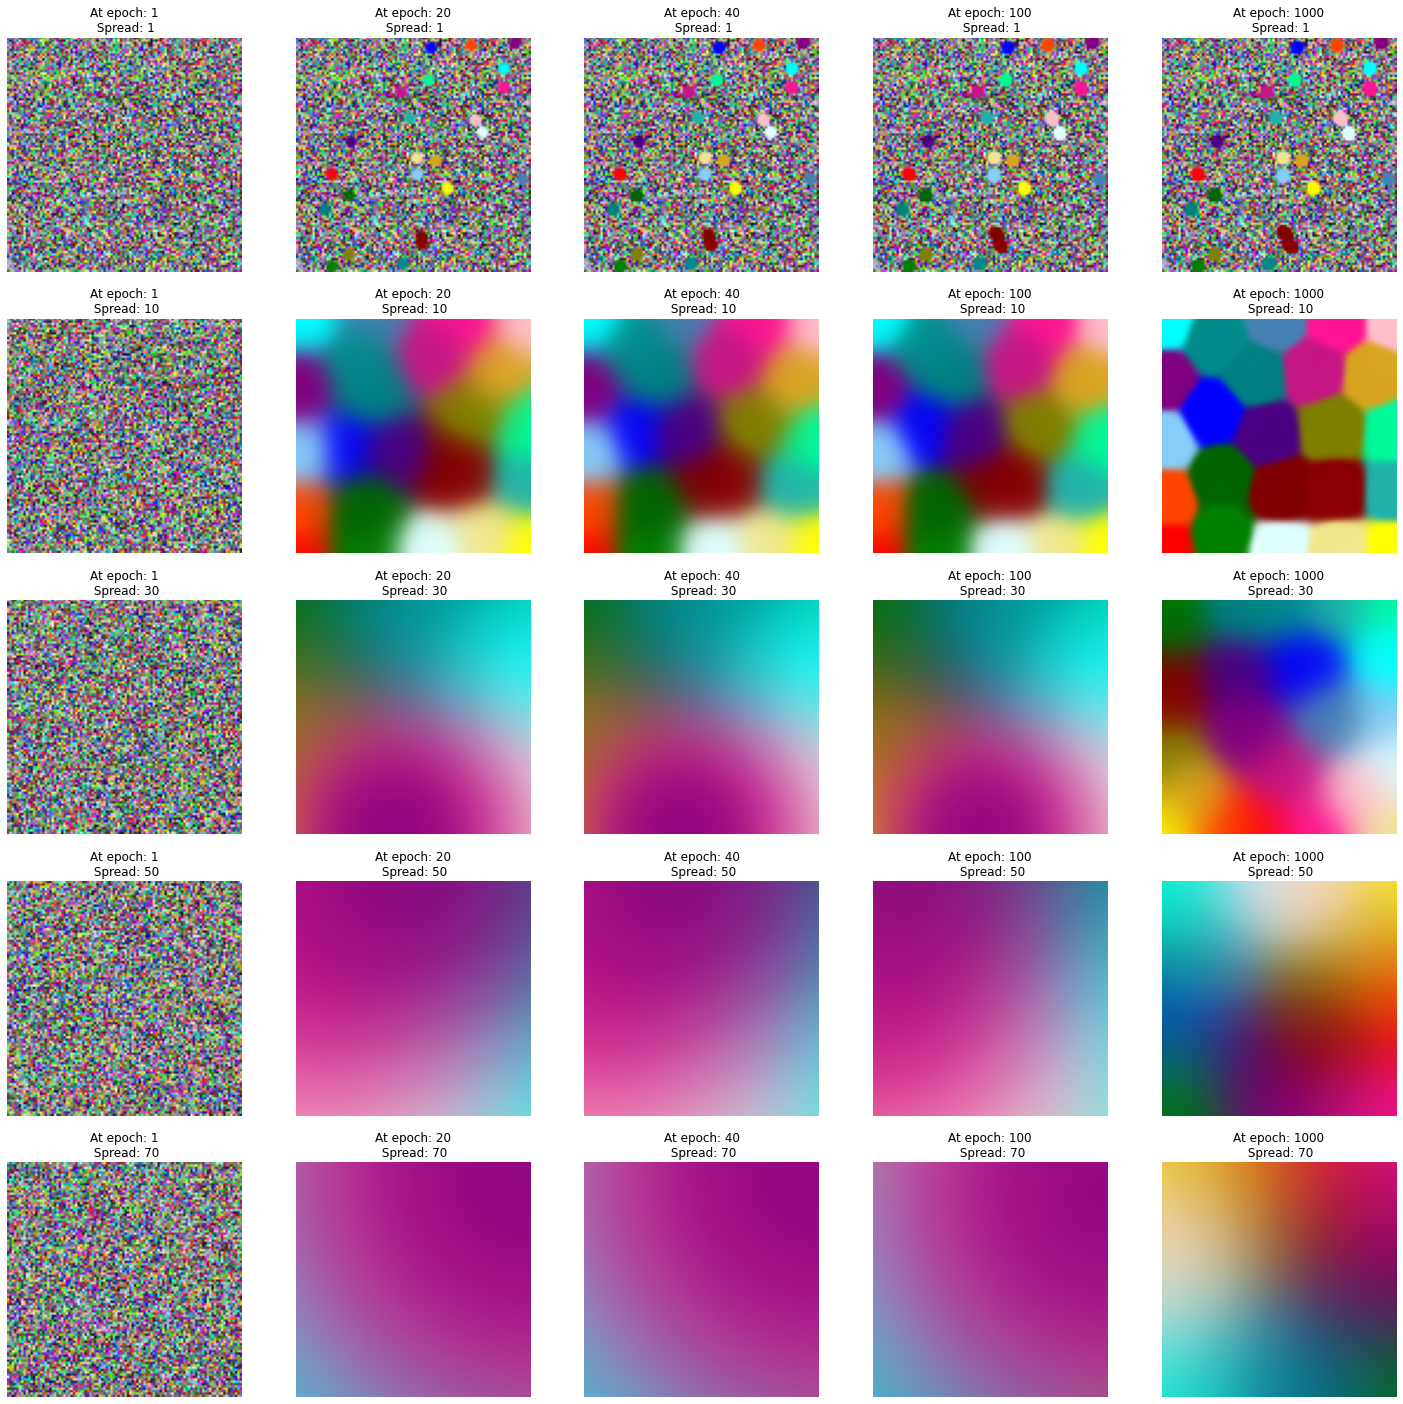

In [3]:
a = assignment(alpha_init = 0.8, test_sigmas_init = [1, 10, 30, 50, 70], max_epochs = 1000, checkpoints_epoch = [20, 40, 100, 1000])
a.generate_input_data()
a.train_and_observe()


#### Example from Class

In [ ]:
# # Example from class
# weights = [[0.2, 0.4, 0.1],
#      [0.3, 0.2, 0.2],
#      [0.5, 0.3, 0.5],
#      [0.1, 0.1, 0.1]]
# ksom_2 = KSOM(size_input_features = 4, rows = 3, columns = 1, alpha_init = 0.3, alpha_update = 0.3, w = np.array(weights), neighbourhood = False, max_epochs = 2)

# input = [[1, 1, 1, 0],
#      [0, 0, 0, 1],
#      [1, 1, 0, 0],
#      [0, 0, 1, 1]]

# ksom_2.train(np.array(input), checkpoints = [1,2])